# Unveiling User Sentiment with Lexicon-Based Analysis
Understanding user sentiment is crucial in various fields, from gauging customer satisfaction to analyzing social media trends. Lexicon-based sentiment analysis offers a robust approach for extracting sentiment from text data. This technique relies on pre-defined dictionaries (lexicons) that assign sentiment scores to specific words.

## This study explores three prominent lexicon-based models:

### VADER (Valence Aware Dictionary and sEntiment Reasoner): 
Specifically designed for social media text, VADER accounts for sentiment intensity and considers factors like capitalization and punctuation.
### Afinn: 
A widely used lexicon with a simple positive/negative scoring system for individual words.
### Rule-Based Lexicon Model: 
This custom-built lexicon allows for tailoring sentiment scores to specific domains or applications.
By analyzing the sentiment distribution using these models, we aim to:

Compare their effectiveness in capturing user sentiment from a given dataset.
Identify potential strengths and limitations of each model.
Gain insights into the overall sentiment expressed within the data.
This investigation will shed light on the value of lexicon-based sentiment analysis and pave the way for choosing the most suitable approach for different use cases.

In [2]:
!pip install mplcursors

     ---------------------------------------- 0.0/88.8 kB ? eta -:--:--
     ----------------- -------------------- 41.0/88.8 kB 991.0 kB/s eta 0:00:01
     ---------------------------------------- 88.8/88.8 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20744 sha256=fda3264c21f8e0322962515121e07632d0dec7f4fed68fd5577a932d79d37632
  Stored in directory: c:\users\siban\appdata\local\pip\cache\wheels\10\b6\58\05d5160d055ea77855fc4324d32a33f9ddea3e5289f315e738
Successfully built mplcursors


In [30]:
import  pandas as pd
import re
from math import ceil
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import mplcursors
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from afinn import Afinn

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\siban\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\siban\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siban\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
# read csv file
review = pd.read_csv("Reviews.csv")

# showing data 
review.sample(10)

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
8396,69228fa2-2bb1-4b47-9f3a-602fc6105eb3,Mohammad Khorvash,https://play-lh.googleusercontent.com/a-/ALV-U...,Aesthetically designed and almost perfect but ...,0,NaN,27-03-2024 10:27,"Hello Mohammad, thank you for your feedback! T...",01-04-2024 20:29,NaN,newest,com.habitnow
2480,66f0e10b-6b34-4a92-8607-04426738561e,G K,https://play-lh.googleusercontent.com/a/ACg8oc...,Unable to subscribe. I am from India. I think ...,3,5.5.6.0,04-05-2020 14:46,"Hi, please contact us at support@ticktick.com....",05-05-2020 11:15,5.5.6.0,most_relevant,com.ticktick.task
6982,e367067a-bdd5-4aa0-a710-09e4d67e1eae,Sam Shoghi,https://play-lh.googleusercontent.com/a-/ALV-U...,Pretty useful app. thanks,0,1.5.15,26-06-2022 11:55,NaN,NaN,1.5.15,newest,com.oristats.habitbull
3719,55b1a009-c734-4479-b48e-01257d53e554,Jackson Lawler,https://play-lh.googleusercontent.com/a/ACg8oc...,Asked me to rate it before I've had a chance t...,0,4.3.6,17-03-2024 21:02,"Hi, Jackson! We have a number of conditions th...",24-03-2024 23:27,4.3.6,newest,com.habitrpg.android.habitica
5043,8e743ed5-afb2-41cb-ab7f-c18c6ecd2acf,walaa,https://play-lh.googleusercontent.com/a-/ALV-U...,I really hate the fact that trees look differe...,0,4.72.0,03-01-2024 13:26,"Hi,\nThank you for the feedback! Would you min...",04-01-2024 08:35,4.72.0,most_relevant,cc.forestapp
3551,aed8c929-6623-4491-8323-08a463566f65,Nick Murdaugh,https://play-lh.googleusercontent.com/a/ACg8oc...,"It's excellent, absolutely better than anythin...",0,7.1.4.0,29-03-2024 22:31,NaN,NaN,7.1.4.0,newest,com.ticktick.task
2570,487c28f0-05aa-4d5a-ab1d-d9104e70937f,Sheree Grier,https://play-lh.googleusercontent.com/a-/ALV-U...,Still makes loud noises even with the app's no...,1,7.0.3.2,19-12-2023 15:18,NaN,NaN,7.0.3.2,newest,com.ticktick.task
5296,fefadb83-fad2-4aed-8f45-15ae95cc7f81,Kate Sedivy-Haley,https://play-lh.googleusercontent.com/a/ACg8oc...,"App was useful, but I was very disappointed wh...",108,4.26.0,27-10-2020 18:27,"Hello, we have made changes to the relevant me...",01-11-2020 15:54,4.26.0,most_relevant,cc.forestapp
3729,6bad5848-892c-4779-9b22-825650748fc2,Nur Wafi,https://play-lh.googleusercontent.com/a/ACg8oc...,fix bug if tick got red error and it wont tick.,1,4.3.3,27-02-2024 22:13,Sorry to hear about this issue. Please let us ...,29-02-2024 20:30,4.3.3,newest,com.habitrpg.android.habitica
3190,daad0fab-5346-4688-8930-f882ec1f5966,Maaveeran MV,https://play-lh.googleusercontent.com/a/ACg8oc...,Please avail option of adding task from locksc...,0,6.3.4.1,25-11-2022 06:05,NaN,NaN,6.3.4.1,newest,com.ticktick.task


In [32]:
#check rows & columns of the dataframe 
review.shape


(16787, 12)

In [33]:
#some basic information of dataset
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16787 non-null  object
 1   userName              16787 non-null  object
 2   userImage             16787 non-null  object
 3   content               16786 non-null  object
 4   thumbsUpCount         16787 non-null  int64 
 5   reviewCreatedVersion  14430 non-null  object
 6   at                    16787 non-null  object
 7   replyContent          9168 non-null   object
 8   repliedAt             9168 non-null   object
 9   appVersion            14430 non-null  object
 10  sortOrder             16787 non-null  object
 11  appId                 16787 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.5+ MB


# Data Pre-processing

In [34]:
review.drop(columns=['userImage','reviewCreatedVersion'],axis=1,inplace=True)

review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewId       16787 non-null  object
 1   userName       16787 non-null  object
 2   content        16786 non-null  object
 3   thumbsUpCount  16787 non-null  int64 
 4   at             16787 non-null  object
 5   replyContent   9168 non-null   object
 6   repliedAt      9168 non-null   object
 7   appVersion     14430 non-null  object
 8   sortOrder      16787 non-null  object
 9   appId          16787 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.3+ MB


In [35]:
#converting datatype for the int column
review['thumbsUpCount'] = review['thumbsUpCount'].astype('int16')

In [36]:
# Coverting the two column of the data set as date and time.
datetime_colms = ['at','repliedAt']
for c in datetime_colms:
    review[c] = pd.to_datetime(review[c], dayfirst=True)

In [37]:
# Checking the Data Type
review['sortOrder'].unique()

array(['most_relevant', 'newest'], dtype=object)

In [38]:
# Checking the various apps  in the dataset.
review['appId'].unique()

array(['com.anydo', 'com.todoist', 'com.ticktick.task',
       'com.habitrpg.android.habitica', 'cc.forestapp',
       'com.oristats.habitbull', 'com.levor.liferpgtasks', 'com.habitnow',
       'com.microsoft.todos', 'prox.lab.calclock',
       'com.gmail.jmartindev.timetune', 'com.artfulagenda.app',
       'com.tasks.android', 'com.appgenix.bizcal', 'com.appxy.planner'],
      dtype=object)

In [39]:
# Coverting their datatypes
categorical_colms = {'sortOrder':'category', 'appId':'category'}
review = review.astype(categorical_colms)

In [40]:
# Converting the data types into string.
string_colms = {'reviewId': 'string',
                'userName': 'string',
               'content' : 'string',
               'replyContent': 'string',
               'appVersion': 'string'}
review = review.astype(string_colms)
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16787 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16787 non-null  string        
 1   userName       16787 non-null  string        
 2   content        16786 non-null  string        
 3   thumbsUpCount  16787 non-null  int16         
 4   at             16787 non-null  datetime64[ns]
 5   replyContent   9168 non-null   string        
 6   repliedAt      9168 non-null   datetime64[ns]
 7   appVersion     14430 non-null  string        
 8   sortOrder      16787 non-null  category      
 9   appId          16787 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), string(5)
memory usage: 984.5 KB


In [76]:
# Convert to lower case
review['content'] = review['content'].str.lower()

review.sample(5)

,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment_scores,compound,positive,negative,neutral,sentiment,sentiment_score
1430,b413c7bf-de34-4f91-88db-99c829cfa38c,Atif Khan,liked app using month decided upgrade premium ...,14,2024-03-05 06:45:00,"Hi Atif! Unfortunately, the app needs to be ru...",2024-03-12 12:59:00,v11310,most_relevant,com.todoist,"{'neg': 0.205, 'neu': 0.593, 'pos': 0.203, 'co...",0.2168,0.203,0.205,0.593,negative,-1
14308,e9277780-dae7-4068-857a-d3b11e49a615,Michelle Landwehr,straightforward easy use,0,2024-04-06 15:13:00,"Hi Michelle, thank you for the positive review...",2024-04-06 16:18:00,3.14.3,newest,com.tasks.android,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,0.592,0.000,0.408,neutral,0
5026,fc597b77-a539-42e5-8d22-c89259fcc738,Nick L,really enjoyed app signed paid pro didnt even ...,1,2024-03-29 14:36:00,"Hi, that doesn't sound usual. Could you please...",2024-04-01 06:09:00,4.73.2,most_relevant,cc.forestapp,"{'neg': 0.051, 'neu': 0.724, 'pos': 0.225, 'co...",0.8350,0.225,0.051,0.724,positive,3
265,e751b2ed-611b-47f2-8a6b-a34d2aa797ab,Phil Simpson,work well look good fantastic alexa support la...,19,2022-04-02 22:38:00,Your suggestion has actually already been adde...,2021-02-17 09:36:00,4.10.6.1,most_relevant,com.anydo,"{'neg': 0.074, 'neu': 0.579, 'pos': 0.347, 'co...",0.9393,0.347,0.074,0.579,positive,3
11030,8110cbdc-8096-4d1c-9df6-769197b9f147,Patrick Bourne,love app always thought time clock face make m...,39,2020-09-18 08:39:00,<NA>,NaT,5.16,most_relevant,prox.lab.calclock,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.8020,0.146,0.000,0.854,positive,1


In [48]:
review = review.dropna(subset=['content'])
review.shape

(16786, 10)

In [50]:
def remove_links(text):
  """Removes links from text, potentially including other patterns."""
  # Customize the patterns (adjust as needed)
  patterns = [r'http\S+', r'www\.\S+']  # Example patterns
  for pattern in patterns:
    text = re.sub(pattern, '', text)
  return text

review['content'] = review['content'].apply(remove_links)

print(review)

                                   reviewId               userName  \
0      0197c118-5c6f-4a7b-894c-970023d1a350                Mar Zur   
1      94868fb5-a21d-4ef9-ab85-81b2ed3d0785           Devin Rivera   
2      825da34e-f65d-4ef3-991d-02d5291820d6          Heidi Kinsley   
3      a49c2875-651a-4c33-b79c-5813780d659e          Daniel Keller   
4      9482c75e-2e63-46ab-8c94-47273dd6a829          A Google user   
...                                     ...                    ...   
16782  e9cebff8-82ad-4191-b196-127a65e9036d  Alexandra Grafwallner   
16783  ab74c21c-3587-4393-a53d-4cb55f3e3c9b          Ljubica Pejic   
16784  0062b15d-6e4d-4f0a-9ea6-ef9b9420d923         Kamiyah Dorsey   
16785  85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d         Keturah Pender   
16786  8e2deadd-1a6a-4817-89dc-4bd9a198332c    Bhagwan Singh Virik   

                                                 content  thumbsUpCount  \
0      i have the same recurring tasks to do every da...             11   
1      in

In [51]:
def remove_newlines(text):
  """Removes newlines from text using regex."""
  text = re.sub(r'\n', '', text)
  return text

review['content'] = review['content'].apply(remove_newlines)

print(review)

                                   reviewId               userName  \
0      0197c118-5c6f-4a7b-894c-970023d1a350                Mar Zur   
1      94868fb5-a21d-4ef9-ab85-81b2ed3d0785           Devin Rivera   
2      825da34e-f65d-4ef3-991d-02d5291820d6          Heidi Kinsley   
3      a49c2875-651a-4c33-b79c-5813780d659e          Daniel Keller   
4      9482c75e-2e63-46ab-8c94-47273dd6a829          A Google user   
...                                     ...                    ...   
16782  e9cebff8-82ad-4191-b196-127a65e9036d  Alexandra Grafwallner   
16783  ab74c21c-3587-4393-a53d-4cb55f3e3c9b          Ljubica Pejic   
16784  0062b15d-6e4d-4f0a-9ea6-ef9b9420d923         Kamiyah Dorsey   
16785  85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d         Keturah Pender   
16786  8e2deadd-1a6a-4817-89dc-4bd9a198332c    Bhagwan Singh Virik   

                                                 content  thumbsUpCount  \
0      i have the same recurring tasks to do every da...             11   
1      in

In [52]:
def remove_alphanumerics(text):
  """Removes words containing both letters and digits from text."""
  text = ' '.join([word for word in text.split() if not any(char.isdigit() for char in word) or not word.isalpha()])
  return text

review['content'] = review['content'].apply(remove_alphanumerics)

print(review)

                                   reviewId               userName  \
0      0197c118-5c6f-4a7b-894c-970023d1a350                Mar Zur   
1      94868fb5-a21d-4ef9-ab85-81b2ed3d0785           Devin Rivera   
2      825da34e-f65d-4ef3-991d-02d5291820d6          Heidi Kinsley   
3      a49c2875-651a-4c33-b79c-5813780d659e          Daniel Keller   
4      9482c75e-2e63-46ab-8c94-47273dd6a829          A Google user   
...                                     ...                    ...   
16782  e9cebff8-82ad-4191-b196-127a65e9036d  Alexandra Grafwallner   
16783  ab74c21c-3587-4393-a53d-4cb55f3e3c9b          Ljubica Pejic   
16784  0062b15d-6e4d-4f0a-9ea6-ef9b9420d923         Kamiyah Dorsey   
16785  85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d         Keturah Pender   
16786  8e2deadd-1a6a-4817-89dc-4bd9a198332c    Bhagwan Singh Virik   

                                                 content  thumbsUpCount  \
0      i have the same recurring tasks to do every da...             11   
1      in

In [53]:
def remove_extra_spaces(text):
  """Removes extra spaces from both ends and within the text."""
  text = ' '.join(text.strip().split())  # Remove leading/trailing & extra spaces
  return text

review['content'] = review['content'].apply(remove_extra_spaces)

print(review)

                                   reviewId               userName  \
0      0197c118-5c6f-4a7b-894c-970023d1a350                Mar Zur   
1      94868fb5-a21d-4ef9-ab85-81b2ed3d0785           Devin Rivera   
2      825da34e-f65d-4ef3-991d-02d5291820d6          Heidi Kinsley   
3      a49c2875-651a-4c33-b79c-5813780d659e          Daniel Keller   
4      9482c75e-2e63-46ab-8c94-47273dd6a829          A Google user   
...                                     ...                    ...   
16782  e9cebff8-82ad-4191-b196-127a65e9036d  Alexandra Grafwallner   
16783  ab74c21c-3587-4393-a53d-4cb55f3e3c9b          Ljubica Pejic   
16784  0062b15d-6e4d-4f0a-9ea6-ef9b9420d923         Kamiyah Dorsey   
16785  85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d         Keturah Pender   
16786  8e2deadd-1a6a-4817-89dc-4bd9a198332c    Bhagwan Singh Virik   

                                                 content  thumbsUpCount  \
0      i have the same recurring tasks to do every da...             11   
1      in

In [54]:
def remove_special_chars(text):
  """Removes special characters (except alphanumeric and whitespace) from text using regex."""
  text = re.sub(r'[^\w\s]', '', text)  # Use \w for alphanumeric
  return text

review['content'] = review['content'].apply(remove_special_chars)

print(review)

                                   reviewId               userName  \
0      0197c118-5c6f-4a7b-894c-970023d1a350                Mar Zur   
1      94868fb5-a21d-4ef9-ab85-81b2ed3d0785           Devin Rivera   
2      825da34e-f65d-4ef3-991d-02d5291820d6          Heidi Kinsley   
3      a49c2875-651a-4c33-b79c-5813780d659e          Daniel Keller   
4      9482c75e-2e63-46ab-8c94-47273dd6a829          A Google user   
...                                     ...                    ...   
16782  e9cebff8-82ad-4191-b196-127a65e9036d  Alexandra Grafwallner   
16783  ab74c21c-3587-4393-a53d-4cb55f3e3c9b          Ljubica Pejic   
16784  0062b15d-6e4d-4f0a-9ea6-ef9b9420d923         Kamiyah Dorsey   
16785  85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d         Keturah Pender   
16786  8e2deadd-1a6a-4817-89dc-4bd9a198332c    Bhagwan Singh Virik   

                                                 content  thumbsUpCount  \
0      i have the same recurring tasks to do every da...             11   
1      in

In [55]:
def remove_stopwords(text):
  """Removes stop words from text."""
  stop_words = set(stopwords.words('english'))  # Load stop words once outside the function
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

review['content'] = review['content'].apply(remove_stopwords)
advanced_review = review.copy()
review.info()

print(review)

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewId       16786 non-null  string        
 1   userName       16786 non-null  string        
 2   content        16786 non-null  object        
 3   thumbsUpCount  16786 non-null  int16         
 4   at             16786 non-null  datetime64[ns]
 5   replyContent   9167 non-null   string        
 6   repliedAt      9167 non-null   datetime64[ns]
 7   appVersion     14429 non-null  string        
 8   sortOrder      16786 non-null  category      
 9   appId          16786 non-null  category      
dtypes: category(2), datetime64[ns](2), int16(1), object(1), string(4)
memory usage: 1.1+ MB
                                   reviewId               userName  \
0      0197c118-5c6f-4a7b-894c-970023d1a350                Mar Zur   
1      94868fb5-a21d-4ef9-ab85-81b2ed3d0785        

In [57]:
#lemmatization
def lemmatize_text(text):
  """Lemmatizes words in text using WordNetLemmatizer."""
  lemmatizer = WordNetLemmatizer()  # Load lemmatizer outside the function
  text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
  return text

review['content'] = review['content'].apply(lemmatize_text)
review['content'] = review['content'].astype('string')

print(review)

                                   reviewId               userName  \
0      0197c118-5c6f-4a7b-894c-970023d1a350                Mar Zur   
1      94868fb5-a21d-4ef9-ab85-81b2ed3d0785           Devin Rivera   
2      825da34e-f65d-4ef3-991d-02d5291820d6          Heidi Kinsley   
3      a49c2875-651a-4c33-b79c-5813780d659e          Daniel Keller   
4      9482c75e-2e63-46ab-8c94-47273dd6a829          A Google user   
...                                     ...                    ...   
16782  e9cebff8-82ad-4191-b196-127a65e9036d  Alexandra Grafwallner   
16783  ab74c21c-3587-4393-a53d-4cb55f3e3c9b          Ljubica Pejic   
16784  0062b15d-6e4d-4f0a-9ea6-ef9b9420d923         Kamiyah Dorsey   
16785  85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d         Keturah Pender   
16786  8e2deadd-1a6a-4817-89dc-4bd9a198332c    Bhagwan Singh Virik   

                                                 content  thumbsUpCount  \
0      recurring task every day need todolist reminde...             11   
1      in

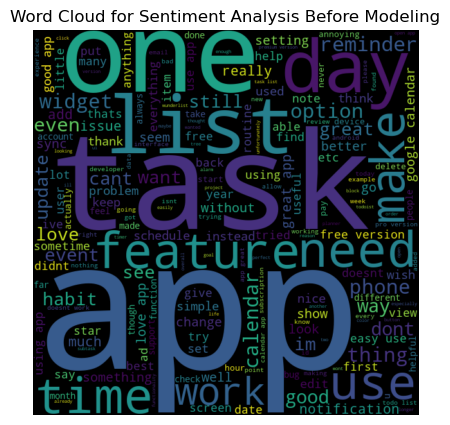

In [58]:
# Concatenate all text data into a single string
text_data = " ".join(review['content'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=600, height=600).generate(text_data)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Sentiment Analysis Before Modeling")
plt.show()

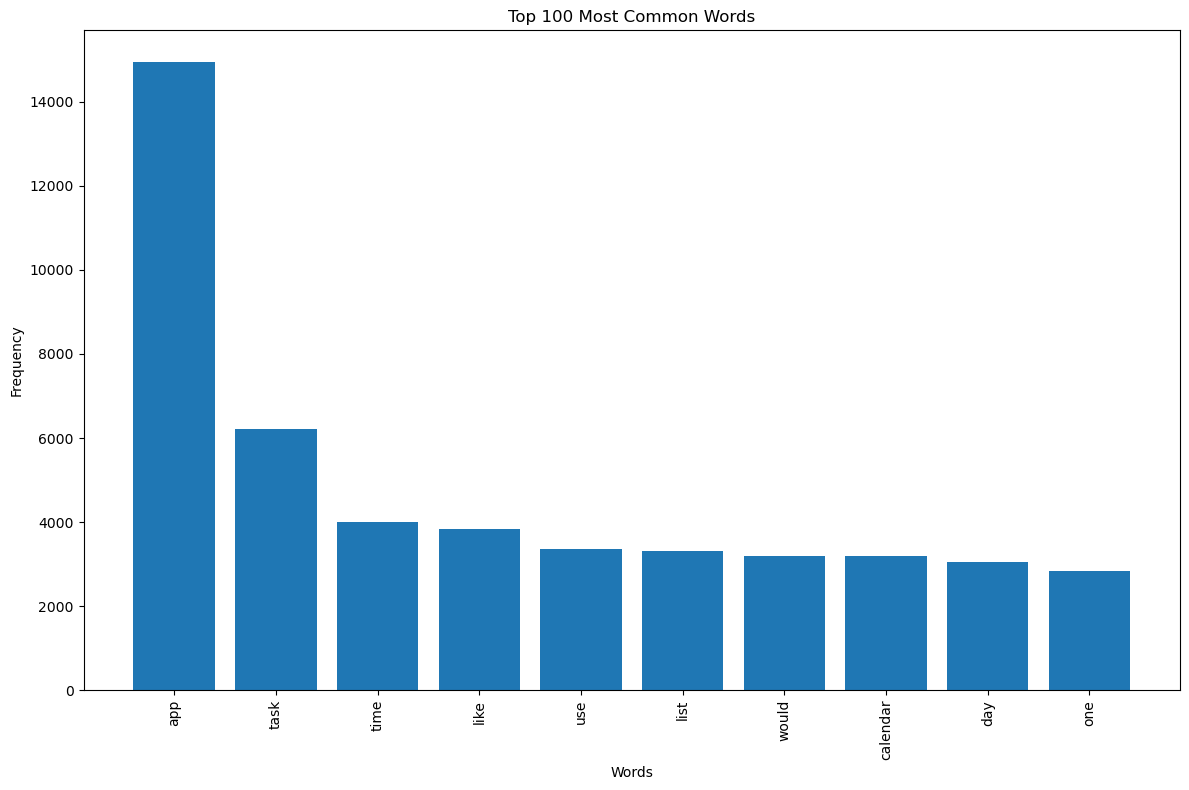

In [63]:
# Split text data into words and count frequencies
words = text_data.split()
word_counts = Counter(words)

# Plot bar chart
common_words = word_counts.most_common(10)  # Top 10 most common words
plt.figure(figsize=(12,8))
plt.bar([word[0] for word in common_words], [word[1] for word in common_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 100 Most Common Words')
plt.xticks(rotation=90)
plt.tight_layout()
mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(f"Frequency: {sel.artist.get_height()}"))
plt.show()

# MODELING

### VADER (Valence Aware Dictionary and sEntiment Reasoner):
VADER is a lexicon and rule-based sentiment analysis tool specifically designed for social media text. It assigns sentiment scores (positive, negative, or neutral) to individual words and calculates an overall sentiment score for a text based on the combination of these word-level scores and syntactic rules.

In [65]:
# Initialize the VADER sentiment analyzer
ss = SentimentIntensityAnalyzer()

# Function to get sentiment scores using VADER
def get_sentiment_scores(text):
    scores = ss.polarity_scores(text)
    return scores

# Apply the sentiment analysis function to the 'content' column
review['sentiment_scores'] = review['content'].apply(get_sentiment_scores)

# Extract sentiment scores into separate columns
review['compound'] = review['sentiment_scores'].apply(lambda x: x['compound'])
review['positive'] = review['sentiment_scores'].apply(lambda x: x['pos'])
review['negative'] = review['sentiment_scores'].apply(lambda x: x['neg'])
review['neutral'] = review['sentiment_scores'].apply(lambda x: x['neu'])

# Classify sentiment based on compound score
review['sentiment'] = review['compound'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Display the updated DataFrame with sentiment analysis results
review.head(5)

,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment_scores,compound,positive,negative,neutral,sentiment
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,recurring task every day need todolist reminde...,11,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo,"{'neg': 0.241, 'neu': 0.662, 'pos': 0.097, 'co...",-0.7783,0.097,0.241,0.662,negative
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,instead shopping around downloaded anydo widel...,8,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,<NA>,most_relevant,com.anydo,"{'neg': 0.051, 'neu': 0.889, 'pos': 0.061, 'co...",0.1280,0.061,0.051,0.889,positive
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,every blue app asks update acct email everythi...,6,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo,"{'neg': 0.207, 'neu': 0.753, 'pos': 0.04, 'com...",-0.8357,0.040,0.207,0.753,negative
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,terrible update app used perfect planning cert...,5,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,<NA>,most_relevant,com.anydo,"{'neg': 0.121, 'neu': 0.626, 'pos': 0.252, 'co...",0.7717,0.252,0.121,0.626,positive
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,app deceivingly terrible really nice design fe...,20,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo,"{'neg': 0.214, 'neu': 0.607, 'pos': 0.179, 'co...",-0.2914,0.179,0.214,0.607,negative


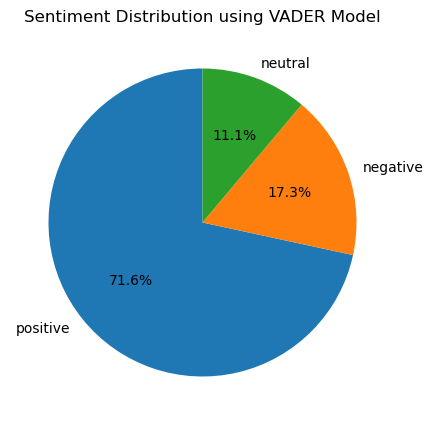

In [66]:
sentiment_counts = review['sentiment'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution using VADER Model')
plt.show()

### AFINN (Affective Norms for English Words):
AFINN is a list of English words manually annotated with sentiment scores ranging from -5 (very negative) to +5 (very positive). It's a simple yet effective lexicon-based approach for sentiment analysis.

In [67]:
# Initialize the Afinn sentiment analyzer
afinn = Afinn()

# Function to get sentiment scores using Afinn
def get_sentiment_scores(text):
    return afinn.score(text)

# Apply the sentiment analysis function to the 'content' column
review['sentiment_score'] = review['content'].apply(get_sentiment_scores)

# Classify sentiment based on sentiment score
review['sentiment'] = review['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the updated DataFrame with sentiment analysis results
review.head(5)

,reviewId,userName,content,thumbsUpCount,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment_scores,compound,positive,negative,neutral,sentiment,sentiment_score
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,recurring task every day need todolist reminde...,11,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo,"{'neg': 0.241, 'neu': 0.662, 'pos': 0.097, 'co...",-0.7783,0.097,0.241,0.662,negative,-6.0
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,instead shopping around downloaded anydo widel...,8,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,<NA>,most_relevant,com.anydo,"{'neg': 0.051, 'neu': 0.889, 'pos': 0.061, 'co...",0.1280,0.061,0.051,0.889,positive,3.0
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,every blue app asks update acct email everythi...,6,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo,"{'neg': 0.207, 'neu': 0.753, 'pos': 0.04, 'com...",-0.8357,0.040,0.207,0.753,negative,-10.0
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,terrible update app used perfect planning cert...,5,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,<NA>,most_relevant,com.anydo,"{'neg': 0.121, 'neu': 0.626, 'pos': 0.252, 'co...",0.7717,0.252,0.121,0.626,positive,4.0
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,app deceivingly terrible really nice design fe...,20,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo,"{'neg': 0.214, 'neu': 0.607, 'pos': 0.179, 'co...",-0.2914,0.179,0.214,0.607,neutral,0.0


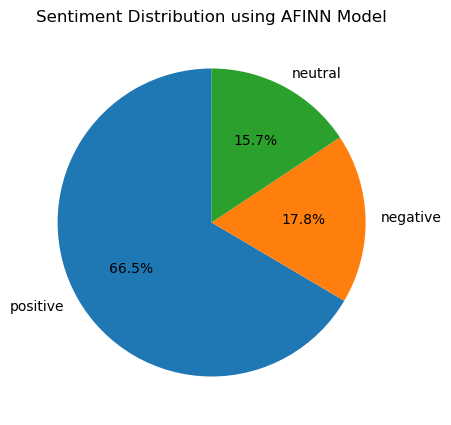

In [68]:
sentiment_counts = review['sentiment'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution using AFINN Model')
plt.show()

### Rule-Based Lexicon Integration:
In rule-based sentiment analysis systems, lexicons are often integrated into predefined rules or heuristics. For example, a rule might state that if a sentence contains more positive words than negative words from a lexicon, classify it as positive sentiment; otherwise, classify it as negative sentiment.

In [70]:
class SentimentAnalyzer:
  """Performs sentiment analysis using a custom lexicon."""

  def __init__(self):
    self.lexicon = {
        'good': 1,
    'excellent': 1,
    'bad': -1,
    'terrible': -1,
    'great' : 1,
    'love' : 1,
    'like': 1,
    'best': 1,
    'annoying': -1,
    'nice': 1,
    'bug': -1,
    'better': 1,
    'problem': -1,
    'issue': -1,
    'pro': 1,
    'perfect': 1,
    'cant': -1,
    'well': 1,
    'helpful': 1,
    'right': 1,
    'dont': -1,
    'simple': 1
        
    }

  def analyze(self, text):
    """Calculates sentiment score and classifies sentiment."""
    words = text.lower().split()
    score = 0
    for word in words:
      if word in self.lexicon:
        score += self.lexicon[word]
    sentiment = 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    return score, sentiment

# Create an analyzer object
analyzer = SentimentAnalyzer()

# Apply sentiment analysis to 'content' column (using list comprehension)
review['sentiment_score'], review['sentiment'] = zip(*[analyzer.analyze(text) for text in review['content']])

# Display the updated DataFrame with sentiment analysis results
print(review.head(5))

                               reviewId       userName  \
0  0197c118-5c6f-4a7b-894c-970023d1a350        Mar Zur   
1  94868fb5-a21d-4ef9-ab85-81b2ed3d0785   Devin Rivera   
2  825da34e-f65d-4ef3-991d-02d5291820d6  Heidi Kinsley   
3  a49c2875-651a-4c33-b79c-5813780d659e  Daniel Keller   
4  9482c75e-2e63-46ab-8c94-47273dd6a829  A Google user   

                                             content  thumbsUpCount  \
0  recurring task every day need todolist reminde...             11   
1  instead shopping around downloaded anydo widel...              8   
2  every blue app asks update acct email everythi...              6   
3  terrible update app used perfect planning cert...              5   
4  app deceivingly terrible really nice design fe...             20   

                   at                                       replyContent  \
0 2020-07-22 13:13:00  Our team will be happy to look into it for you...   
1 2020-12-08 06:24:00  We are not aware of any issues with randomized...

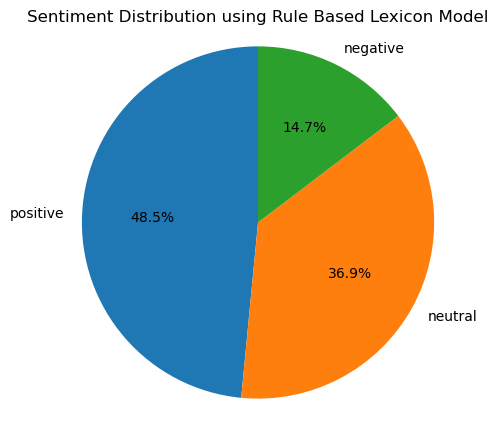

In [72]:
sentiment_counts = review['sentiment'].value_counts()  
plt.figure(figsize=(5, 5))  
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)  
plt.title('Sentiment Distribution using Rule Based Lexicon Model')  
plt.axis('equal')  
plt.show() 

In [73]:
# Get all the individual products
unique_apps = list(review['appId'].unique())

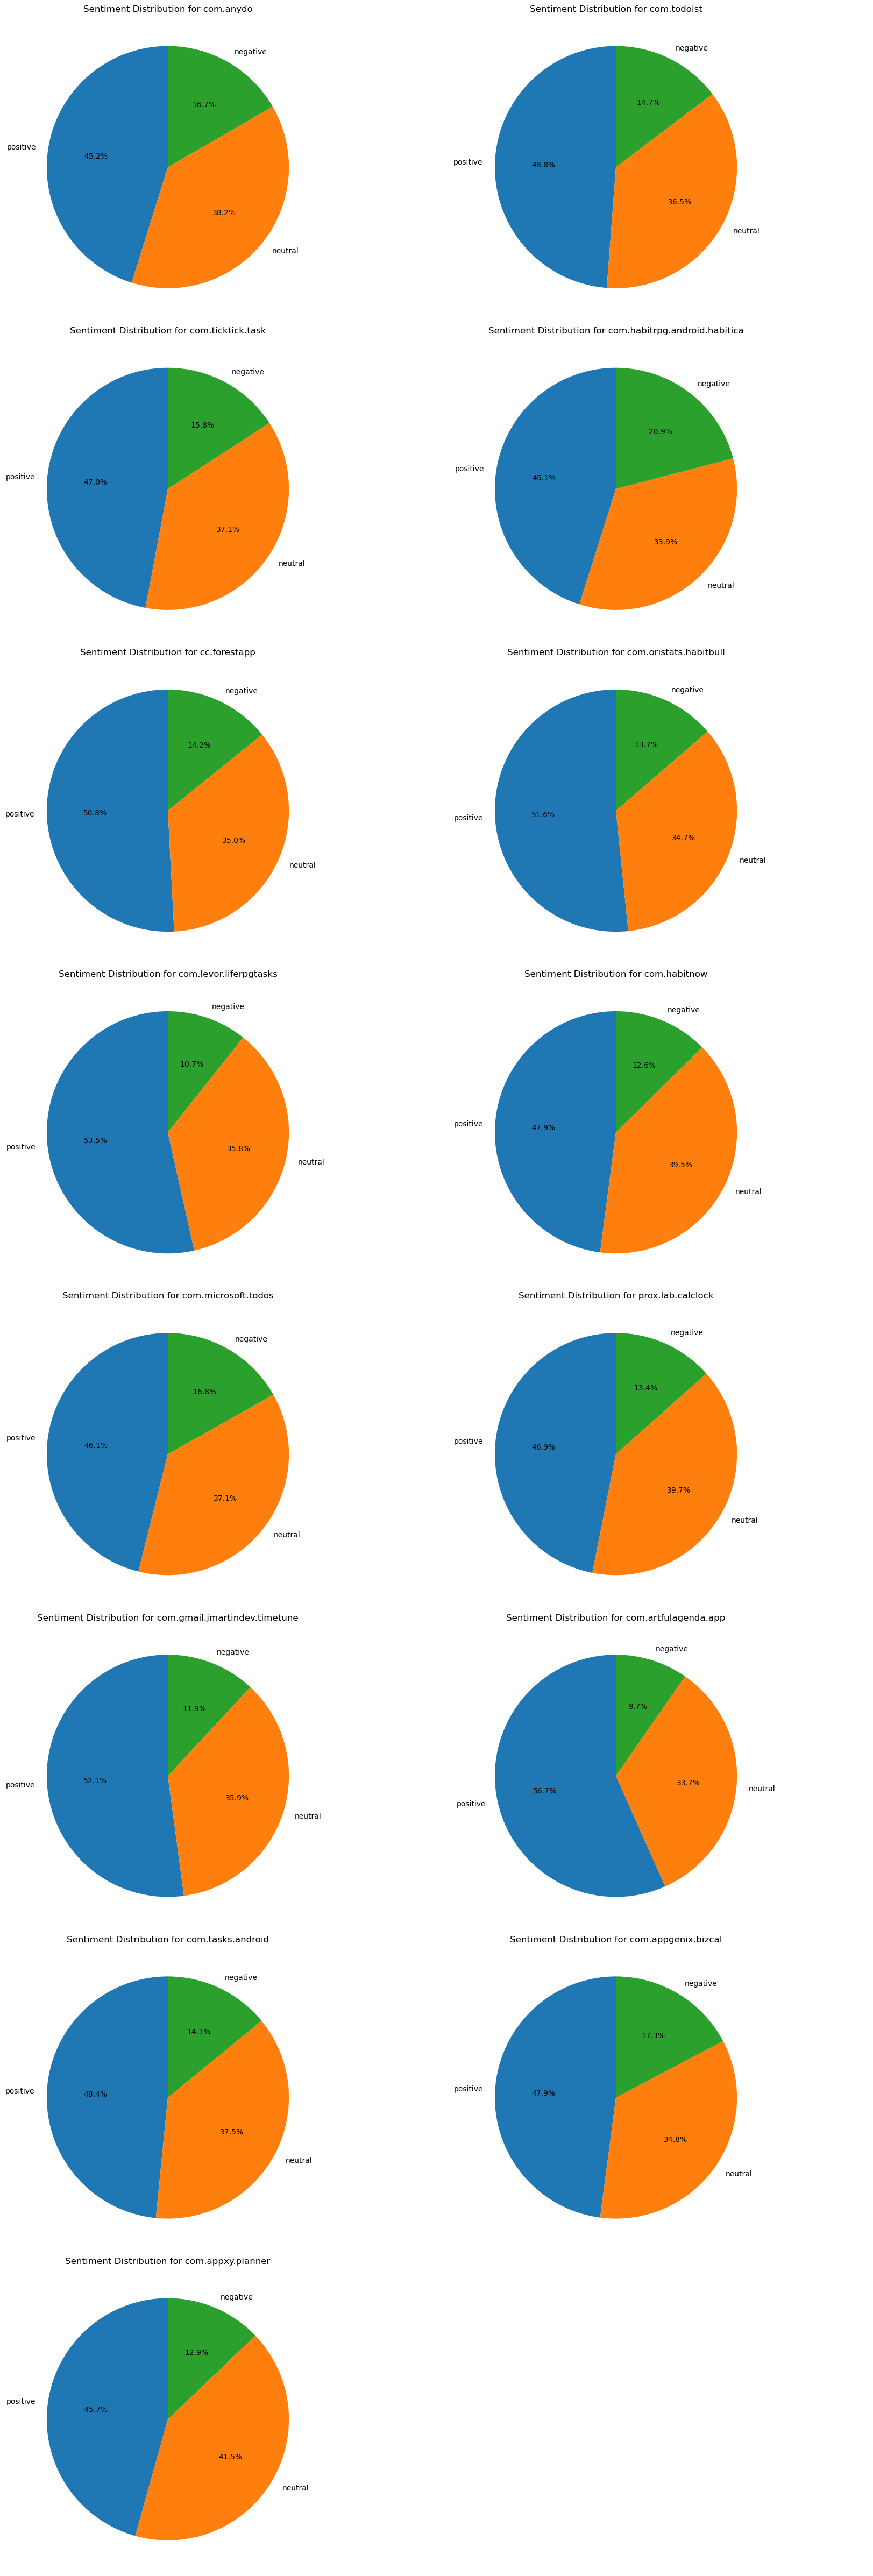

In [75]:
num_apps = len(unique_apps)
num_cols = 2  
num_rows = ceil(num_apps / num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))
axes = axes.flatten()

# Loop through each unique app and create a pie chart
for idx, app in enumerate(unique_apps):
    app_data = review[review['appId'] == app]  
    app_sentiment_counts = app_data['sentiment'].value_counts()

    axes[idx].pie(app_sentiment_counts, labels=app_sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    axes[idx].set_title(f'Sentiment Distribution for {app}')

# Hide empty subplots if there are fewer apps than the number of grid cells
for i in range(num_apps, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Conclusion

# This analysis delves deeper into sentiment analysis by focusing on:

## Considering both content and reply content:
This provides a more comprehensive view of user interactions.
## Extracting relevant words: 
By focusing on adjectives, nouns, and verbs, the analysis captures the core sentiment expressed.
The results solidify the overall positive sentiment observed earlier, but with additional insights:

##  Over All Sentiment distribution based Models  
#### VADER Model = Positive-71.6 , Neagtive - 17.3 , Neutral - 11.1 
#### AFINN Model = Positive-66.5 , Neagtive - 17.8 , Neutral - 15.7
#### Rule Based Lexicon Model = Positive-48.5 , Neagtive - 14.7 , Neutral - 36.9

This analysis suggests that focusing on relevant words provides a clearer picture of sentiment and highlights the potential impact of neutral or negative words in influencing the overall perception. The positive response to reviews with positive sentiment suggests user agreement and emphasizes the importance of positive communication.

## Future considerations:

Explore techniques for identifying and handling potentially negative or neutral words with stronger emotional connotations.
Investigate the role of other user interactions, such as downvotes or replies, in understanding sentiment.



## Thank You 